# In this notebook I will load my model and evaluate it with a new input

In [34]:
import numpy as np
from sklearn.metrics import classification_report

<hr>

## Functions that I'll use in this notebook

In [2]:
from functions import *

### Read the new input dataset


In [3]:
DATASET_PATH = "../dataset/new_input.csv"


In [4]:
print(os.path.exists(DATASET_PATH))

True


In [5]:
# Load the data  
ds_new = pd.read_csv(DATASET_PATH) 

In [6]:
ds_new.shape

(610, 22)

## Feature engineering 

In [7]:
cols_to_del = load_del_cols()

In [9]:
print("Deleting columns:\n" + str(cols_to_del))

Deleting columns:
['stem-root', 'veil-type', 'veil-color', 'spore-print-color', 'Unnamed: 0']


In [10]:
for col in cols_to_del:
    drop_column(ds_new, col)

In [11]:
modes_dict = load_modes_dict()
arbs_dict = load_arbs_dict()
rand_list = load_rand_col_list()

In [13]:
print("Modes imputation:\n" + str(modes_dict))
print("\nArbitrary imputation:\n" + str(arbs_dict))
print("\nRandom imputation:\n" + str(rand_list))

Modes imputation:
{'ring-type': ['f']}

Arbitrary imputation:
{'cap-surface': 'missing', 'gill-attachment': 'missing', 'stem-surface': 'missing'}

Random imputation:
['gill-spacing']


In [15]:
impute_by_dict(ds_new, modes_dict, is_category=True)
impute_by_dict(ds_new, arbs_dict, is_category=True)
impute_by_random(ds_new, rand_list)

['gill-spacing']

<hr>

#### Outlier Engineering

In [18]:
# Load the outlier parameters  
outlier_params = load_outliers() 

In [19]:
# Remove outliers from the new data  
outlier_columns = outlier_params['columns']  
threshold = outlier_params['threshold']

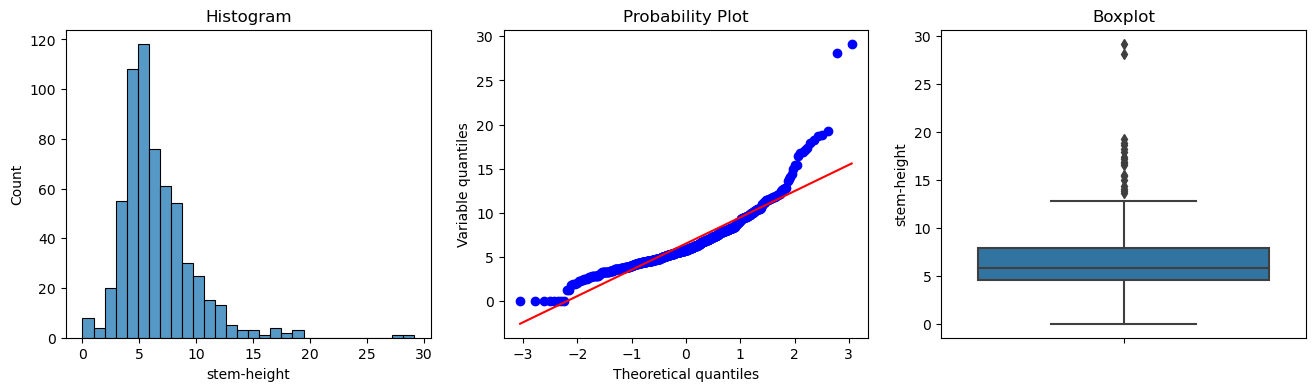

In [20]:
diagnostic_plots(ds_new, 'stem-height')

In [21]:
ds_new = ds_new[(np.abs(stats.zscore(ds_new[outlier_columns])) < threshold).all(axis=1)]  

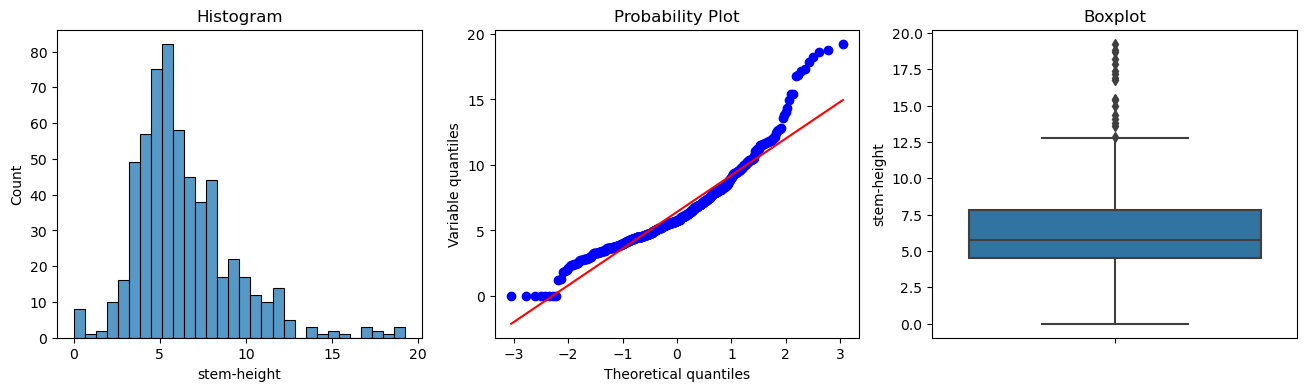

In [22]:
diagnostic_plots(ds_new, 'stem-height')

In [23]:
ds_new.shape

(598, 17)

<hr>

#### Categorical encoding

In [24]:
encoding_map = load_categorical_encoding()

In [ ]:
for column in encoding_map.keys():
    ds_new[column] = ds_new[column].map(encoding_map[column])

<hr>

#### Standardisation

In [25]:
scaler = load_scaler()

In [26]:
# Specify the columns to scale (all columns except 'class')  
columns_to_scale = [col for col in ds_new.columns if col != 'class']  

In [27]:
ds_scaled = scaler.transform(ds_new[columns_to_scale]) 

In [28]:
# Create a new DataFrame with the scaled data  
df_scaled = pd.DataFrame(ds_scaled, columns=columns_to_scale)    

In [29]:
# Copy the 'class' column from the original DataFrame  
df_scaled['class'] = ds_new['class'].values  
ds = df_scaled
# Now df_scaled is a DataFrame with all columns scaled except 'class'  
np.round(ds.describe(), 1)

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season,class
count,598.0,598.0,485.0,598.0,598.0,517.0,598.0,598.0,598.0,598.0,237.0,598.0,598.0,598.0,598.0,598.0,598.0
mean,-0.0,0.0,-0.1,-0.0,-0.0,-0.1,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.1,0.1,0.0,0.5
std,1.0,1.0,1.1,1.0,1.0,1.1,0.9,1.0,1.0,1.0,1.6,0.9,1.0,1.1,1.0,1.0,0.5
min,-1.5,-1.8,-1.9,-1.9,-0.5,-1.2,-0.6,-2.3,-2.2,-1.3,-3.3,-2.3,-0.6,-1.0,-0.5,-1.0,0.0
25%,-0.7,-0.9,-1.0,-0.3,-0.5,-1.2,-0.6,-0.7,-0.6,-0.8,-1.3,-0.7,-0.6,-0.3,-0.5,-1.0,0.0
50%,-0.1,0.5,0.5,-0.3,-0.5,-0.4,-0.6,-0.1,-0.2,-0.2,0.7,0.2,-0.6,-0.3,-0.5,-0.1,1.0
75%,0.5,0.9,0.9,1.2,-0.5,1.2,0.9,0.8,0.5,0.5,1.3,0.8,1.2,-0.3,0.3,0.9,1.0
max,4.3,0.9,1.5,1.5,2.1,1.6,2.4,1.2,4.4,4.8,2.0,1.1,1.7,3.9,5.0,1.8,1.0


<hr>

# Model import

In [30]:
#from sklearn.ensemble import RandomForestClassifier  
  
# Load the model  
model = load_model("../models/RF_Classifier.joblib")  

In [31]:
# Define the columns  
y_column = ['class'] # target variable  
X_columns = ["cap-color",  
            "ring-type",  
            "cap-surface",  
            "gill-attachment",  
            "stem-surface",  
            "gill-spacing",  
            "cap-shape",  
            "does-bruise-or-bleed",  
            "gill-color",  
            "stem-color",  
            "has-ring",  
            "habitat",  
            "season",  
            'stem-height',  
             'stem-width',  
             'cap-diameter',  
             ]   

In [32]:
# Split the data into target variable and attributes  
X = ds_new[X_columns]  
y = ds_new[y_column]  

In [35]:
# Use the model to predict the target variable  
y_pred = model.predict(X)  
  
print('test set metrics: \n', classification_report(y, y_pred))

test set metrics: 
               precision    recall  f1-score   support

           0       0.51      0.66      0.58       273
           1       0.62      0.48      0.54       325

    accuracy                           0.56       598
   macro avg       0.57      0.57      0.56       598
weighted avg       0.57      0.56      0.56       598
